In [3]:
import lightkurve as lk
from vetting import centroid_test

In [1]:
# from s0048-s0048:TCE1
# https://exo.mast.stsci.edu/api/v0.1/Download/file?uri=mast:TESS/product/tess2022028101454-s0048-s0048-0000000018016577-01-00580_dvs.pdf
tic, sector = 18016577, [22, 48]

period=19.769411
t0=2610.5497,
duration=9.2324 / 24

In [5]:
download_dir = "../../data"

sr = lk.search_targetpixelfile(f"TIC {tic}", mission='TESS', sector=sector, cadence='short')
tpfs = sr.download_all(download_dir=download_dir)
tpfs

TargetPixelFileCollection of 2 objects:
    0: TessTargetPixelFile(TICID: 18016577)
    1: TessTargetPixelFile(TICID: 18016577)

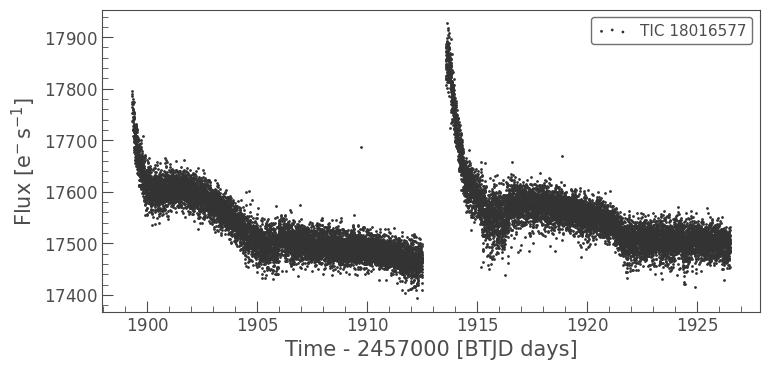

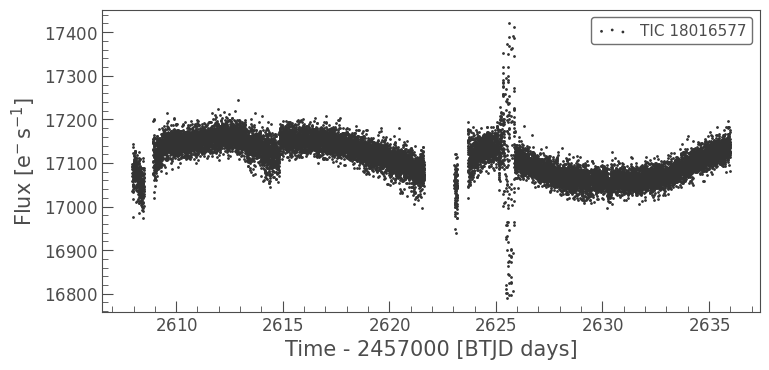

In [6]:
axs =[tpf.to_lightcurve().remove_outliers(sigma=7).scatter() for tpf in tpfs]
# ax.axvline(t0, c='red', ymax=0.15, label="transit");
# ax.legend();

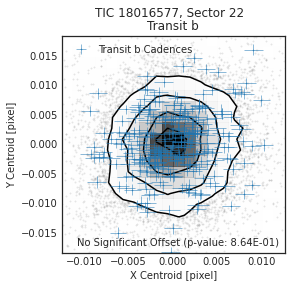

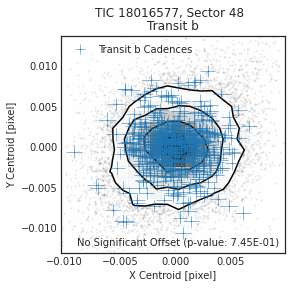

In [7]:
# if p-value is < 0.05 (5%), it means signficant centroid offset
# - distribution of centroid outside dips are not from the same population of the centroid during dips
r = centroid_test(tpfs, period, t0, duration, aperture_mask='pipeline', plot=True);